In [9]:
# some pakages to use
%matplotlib inline


import matplotlib
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import time
import cvxpy as cvx
import scipy
from sklearn.datasets import fetch_mldata

colors_ = np.array(colors.cnames.keys())
matplotlib.rcParams['figure.figsize'] = (8,8)

In [2]:
def frwe_cvx(x, P, alpha=0.1, delta=1e-5, max_times=1000):
    dim = P.shape[0]
    w = cvx.Variable(dim)
    res = cvx.norm(x-cvx.vec(w).T*P)
    entropy = cvx.sum_entries(-cvx.entr(w))
    obj = res + alpha*entropy
    constraints = [0 <= w, cvx.sum_entries(w)==1]
    prob = cvx.Problem(cvx.Minimize(obj), constraints)
    try:
        prob.solve(verbose=False, solver=cvx.ECOS)
    except:
        prob.solve(verbose=False, solver=cvx.SCS)
    return prob

In [4]:
dataset = fetch_mldata('MNIST original')
P=np.array([np.average(dataset.data[0:60000,:][dataset.target[0:60000]==tem,:],0) for tem in range(0,len(set(dataset.target)))])/255
X = dataset.data/255
classes = len(set(dataset.target))
dimensions = X.shape[1]
samples = X.shape[0] 
test_size = 10000

In [255]:
set(dataset.target)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [6]:
problist=[]
now = time.time()
x = dataset.data[60001,:]/255
for temp in np.linspace(0,99,100):
    problist.append(frwe_cvx(x.reshape(1,784),P,alpha=temp))
print time.time()-now

1.86500000954


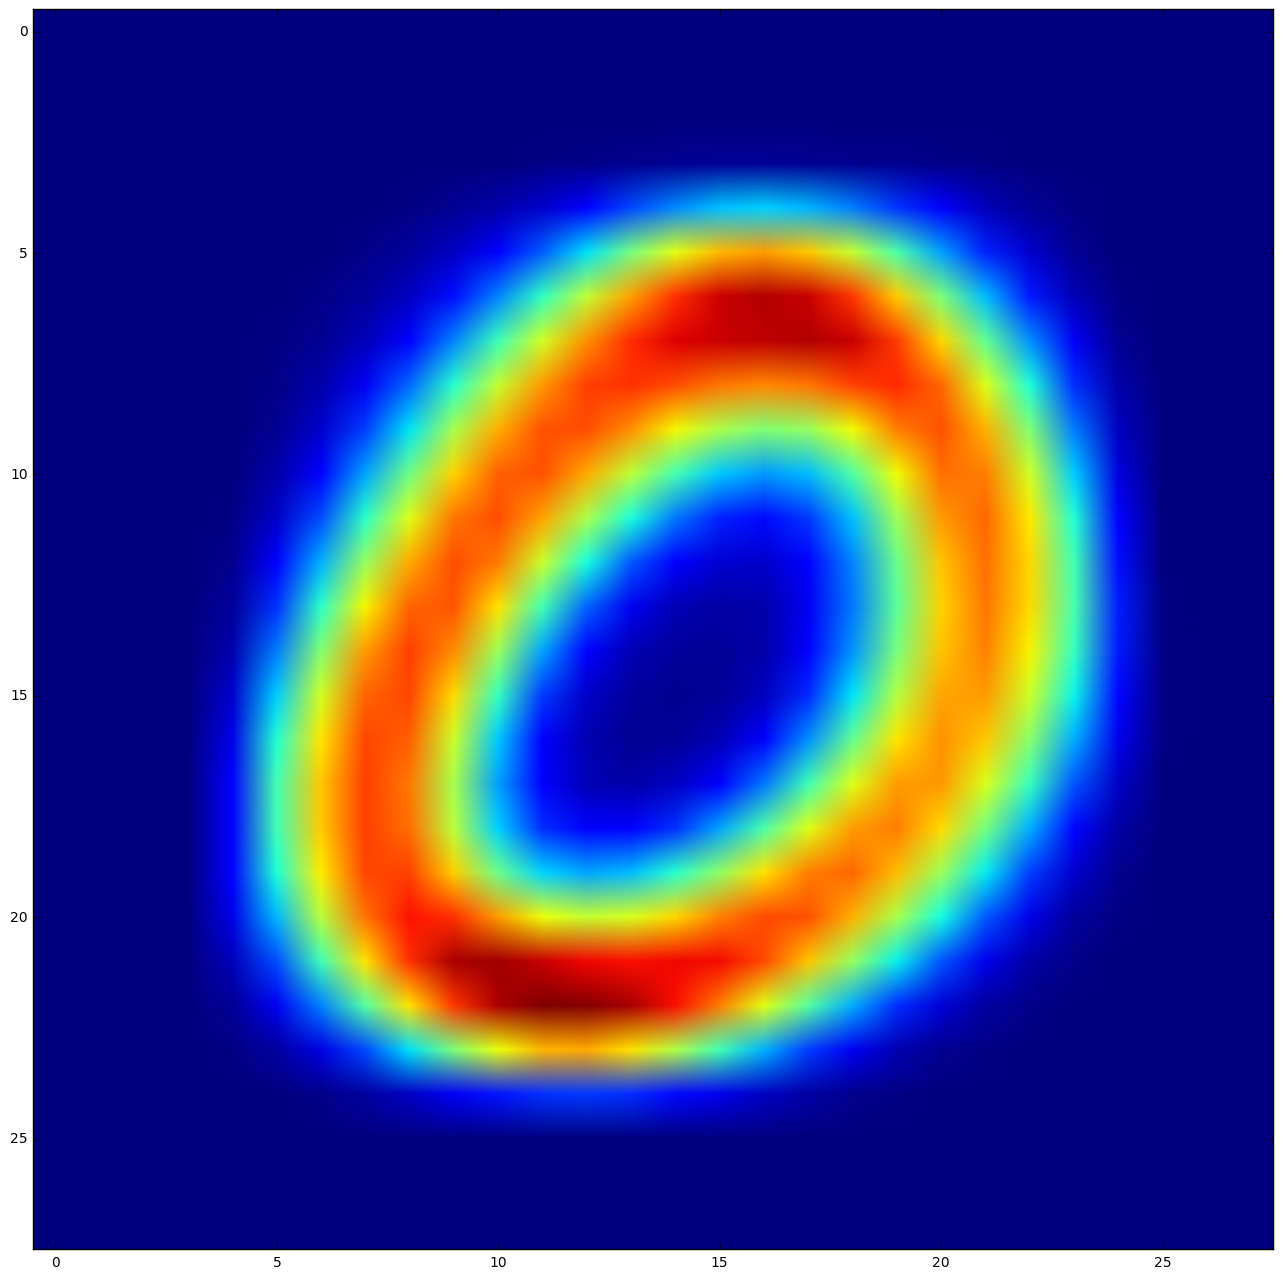

In [7]:
plt.imshow(P[0].reshape(28,28))

1.0
1.78399991989


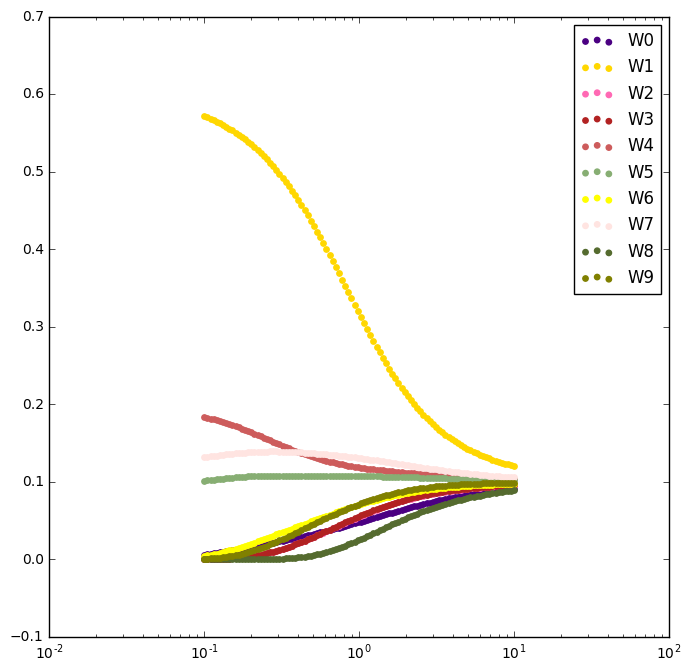

In [10]:
problist=[]
now = time.time()
x = dataset.data[62000,:]/255
print dataset.target[61000]
# plt.imshow(dataset.data[60007,:].reshape(28,28),cmap="gray")
_lambda = np.logspace(-1,1,100)
for temp in _lambda:
    problist.append(frwe_cvx(x.reshape(1,784),P,alpha=temp))
print time.time()-now

res = [tem.value for tem in problist]
resultw = np.array([tem.variables()[0].value.tolist() for tem in problist]).reshape(100,10)
s=[]

for i in range(0,10):
    s.append(plt.scatter(_lambda,resultw[:,i],color=colors_[i],alpha=1,s=15))
# for temp in lines:
#     plt.plot([temp-0.5,temp-0.5],[0,1])
plt.xscale('log')
plt.legend(s, ('W%d'%temp for temp in range(0,10)))
# s.append(plt.scatter(_lambda,np.linalg.norm(np.tile(x.reshape(1,784),(100,1))-resultw.dot(P),axis=1),alpha=1,s=15))

In [194]:
np.linalg.norm(np.tile(x.reshape(1,784),(100,1))-resultw.dot(P),axis=1)
# (resultw.dot(P)).shape
# np.tile(x.reshape(1,784),(10,1)).shape

array([ 1543.90326437,  1543.90431037,  1543.90740084,  1543.91247501,
        1543.91946461,  1543.92831599,  1543.93903706,  1543.95185194,
        1543.96738065,  1543.98669024,  1544.0111414 ,  1544.0422056 ,
        1544.08100575,  1544.12837059,  1544.18468099,  1544.24996371,
        1544.32399587,  1544.40642806,  1544.49680736,  1544.5951299 ,
        1544.70056824,  1544.81317909,  1544.9325546 ,  1545.05882729,
        1545.1916971 ,  1545.33128698,  1545.47765939,  1545.63094926,
        1545.79132301,  1545.95898956,  1546.13418242,  1546.31715835,
        1546.50819177,  1546.70755928,  1546.91554036,  1547.13240949,
        1547.35844264,  1547.59388605,  1547.83932215,  1548.09439591,
        1548.35958131,  1548.63502358,  1548.92088131,  1549.2172842 ,
        1549.52432039,  1549.84206743,  1550.17057728,  1550.50986153,
        1550.85991019,  1551.22071867,  1551.59223066,  1551.97436228,
        1552.36705693,  1552.77019349,  1553.18364964,  1553.60731996,
      

In [142]:
resultw = [tem.variables()[0].value.tolist() for tem in problist]
# resultw = np.array(resultw).reshape(test_size,classes)
# print "样本总数%s, 分类错误数目:"%samples,np.sum(np.abs((resultw.argmax(1)-dataset.target[60000:])!=0))